In [1]:
import numpy as np
from matplotlib import pyplot as py
%matplotlib inline


In [2]:
# set parameters for microchip problem

Lx = 0.01 # length of chip
Ly = 0.01 # width of chip
nx = 21
ny = 21

dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
alpha = 1e-4 # thermal diffusivity

# now we have discretize our domain
x = np.linspace(0.0, Lx, num=nx)
y = np.linspace(0.0, Ly, num=ny)

# describe the initial conditions
T0 = 20.0 * np.ones((ny, nx))
T0[0, :] = 100.0
T0[:, 0] = 100.0


In [29]:
def ftcs(T0, nt, dt, dx, dy, alpha):
    T = T0.copy()
    sigma_x = alpha * dt / dx**2
    sigma_y = alpha * dt / dy**2
    I = int(nx / 2)
    J = int(ny / 2)
    for n in range(nt):
        for j in range(1, ny-1):
            for i in range(1, nx-1):
                T[j, i] = (T[j, i] + 
                           sigma_x * (T[j, i-1] - 2* T[j,i] + T[j, i+1]) +
                           sigma_y * (T[j-1, i] - 2* T[j,i] + T[j+1, i]))
                
        T[0, :] = 100.0  # bottom initial condition
        T[:, 0] = 100.0  # left initial condition
        T[-1, :] = T[-2, :] #top initial condition
        T[:, -1] = T[:, -2] #right initial condition
        
        if T[J, I] >= 70.0:
            break
    print('At time Step {}, the temp at center of chip is {} C'.format(n, T[J, I]))
    return T

In [30]:
# since it is explicit scheme, there are time stability constraints

sigma = 0.5
dt = sigma / (alpha * (1 / dx**2 + 1 / dy**2))
nt = 500

In [31]:
T = ftcs(T0, nt, dt, dx, dy, alpha)

At time Step 127, the temp at center of chip is 70.12723235676388 C


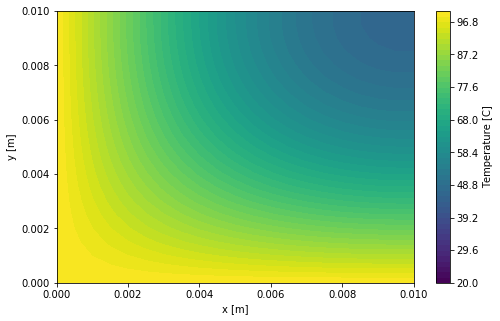

In [34]:
# now we need to vizualize the solution

py.figure(figsize=(8.0, 5.0))
py.xlabel('x [m]')
py.ylabel('y [m]')
contf = py.contourf(x, y, T, 
                    levels= np.linspace(20.0, 100.0, num=51))

cbar = py.colorbar(contf)
cbar.set_label('Temperature [C]')